# Nama : Eurico Devon Bura Pakilaran
# NIM : H071191048
# Prodi : Ilmu Komputer
# Universitas Hasanuddin

In [ ]:
#!pip install tensorflow

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.python.framework.tensor_shape import TensorShape

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape
(6000, 28,28)


(6000, 28, 28)

Kita akan melakukan print dengan menggunakan tensorshape, pada tensorshape dasarnya dia melakukan shape berbentuk grafik. pada tensorshape ini perlu untuk import framework 

In [ ]:

x_train = tf.pad(x_train,[[0,0], [2,2], [4,3]])/255
x_test = tf.pad(x_test, [[0,0], [2,2], [4,3]])/255
x_train.shape


TensorShape([60000, 32, 32])

TensorShape([60000, 32, 32])

In [ ]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape


TensorShape([60000, 32, 32, 1])

TensorShape([60000, 32, 32, 1])

In [ ]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 31, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 14, 15, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 11, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
907/907 [==============================] - 33s 36ms/step - loss: 1.3279 - accuracy: 0.5234 - val_loss: 0.2998 - val_accuracy: 0.9175
Epoch 2/2
907/907 [==============================] - 32s 35ms/step - loss: 0.3426 - accuracy: 0.8935 - val_loss: 0.1839 - val_accuracy: 0.9505


Sesudah itu kita akan melakukan print pada plt citra grafik 

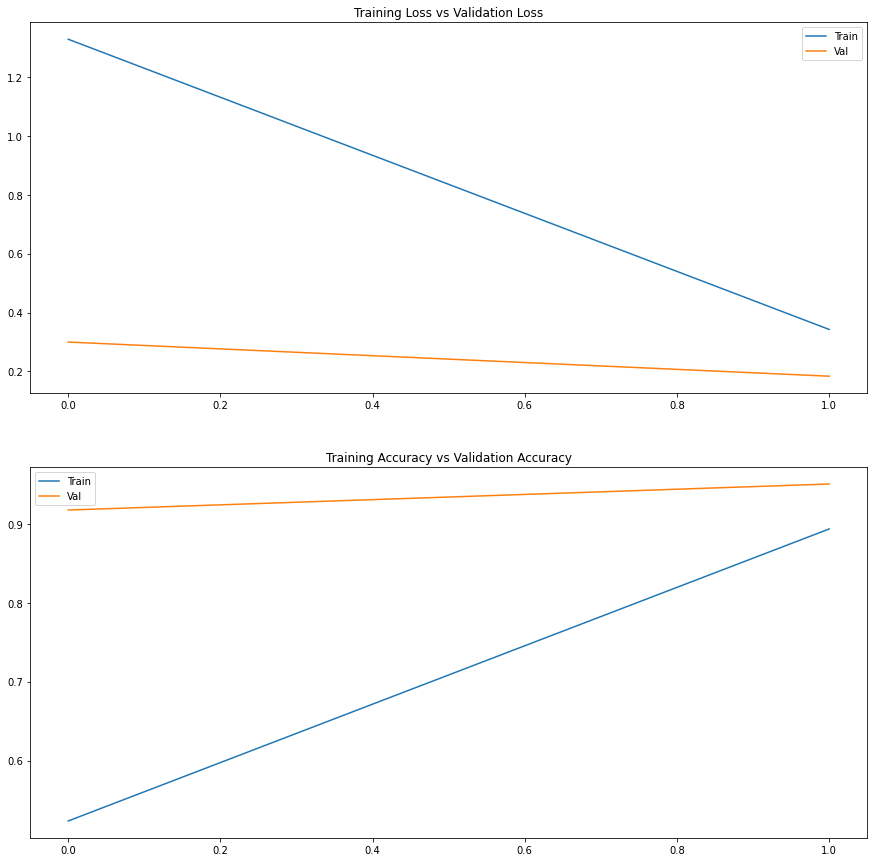

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])




In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2669 - accuracy: 0.9184


[0.2669450342655182, 0.91839998960495]